# Point operations


## Exercises

1. Show the histogram for the two modified images from the lab (`newim` and `newim2`).  (Copy the code for calculating `newim` and `newim2` here.)  Explain how the histogram shows visually how the colors have been transformed.  

*Note: put your text response in a text/Markdown cell, not in code comments.*

In [26]:
import imageio
import numpy as np
from matplotlib import pyplot as plt
import skimage
import matplotlib.colors as colors

/var/folders/q8/mqm68gfx7pjfpqftf7y_v6140000gn/T/ipykernel_76523/4199346340.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread('../lab1-1/love_and_peace.jpg')


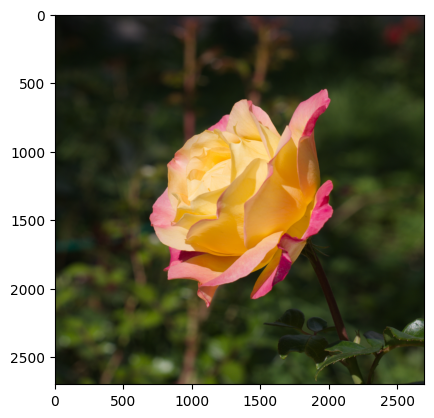

In [8]:
im = imageio.imread('../lab1-1/love_and_peace.jpg')
plt.imshow(im)

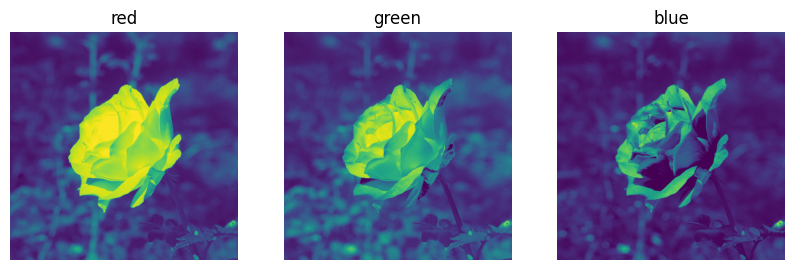

In [9]:
im = im.astype('float32')/255
fig,axes = plt.subplots(1,3,figsize=(10,20))

channels = ['red','green','blue']
for i,(ax,channel) in enumerate(zip(axes,channels)):
    ax.imshow(im[...,i])
    ax.axis('off')
    ax.set_title(channel)

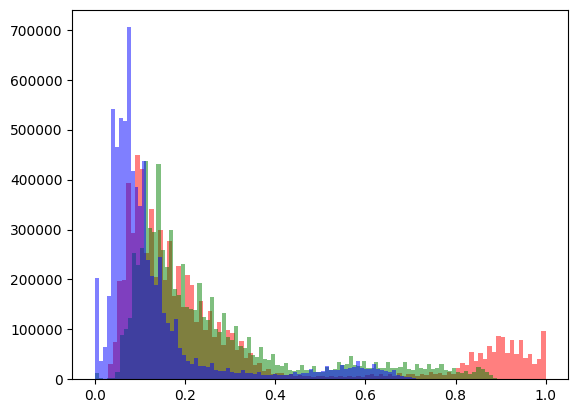

In [ ]:
for i,channel in enumerate(channels):
    plt.hist(im[:,:,i].flatten(),bins=100,color=channel,alpha=0.5)
plt.show()

The histogram is showing how the each of the red, green, and blue channels has been scaled to the [0,1] range and how the pixels are distributed within that range for each color channel. The distribution is the transformation from the raw 8-bit color values to the normalized values. The code where the values are scaled so that they lie in the range [0,1] leads to the x-axis now running from 0 (black) to 1 (white). A peak near 0 means that pixels are dark (low intensity) for that color channel, while 1 means many pixels are bright.

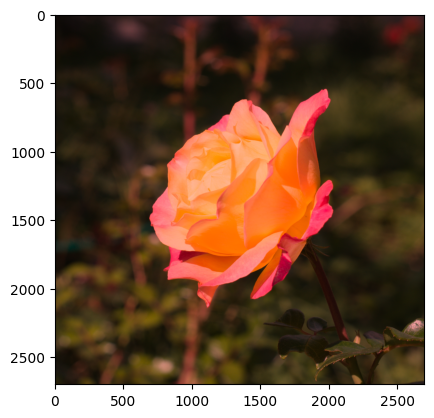

In [11]:
newim = im.copy()
newim[...,0] *= 1.25
newim[...,1] /= 1.25
newim[...,2] /= 1.25
newim = np.clip(newim,0,1)
plt.imshow(newim)

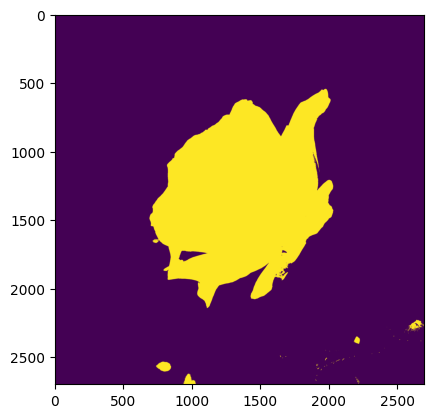

In [12]:
mask = im[...,0]>0.5
plt.imshow(mask)

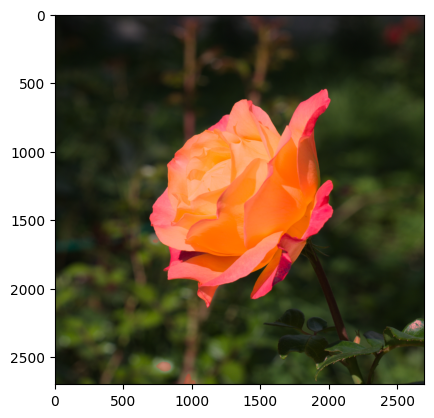

In [13]:
newim = im.copy()
newim[mask,0] *= 1.25
newim[mask,1] /= 1.25
newim[mask,2] /= 1.25
newim = np.clip(newim,0,1)
plt.imshow(newim)

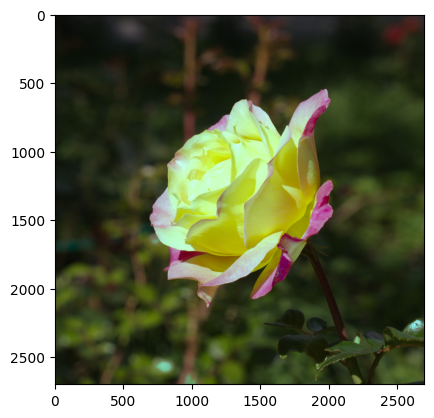

In [14]:
newim2 = im.copy()
newim2[mask,0] /= 1.25
newim2[mask,1] *= 1.25
newim2[mask,2] *= 1.25
newim2 = np.clip(newim2,0,1)
plt.imshow(newim2)

2. Invert the image (compute one minus the image).  What does this do to the colors in the image?

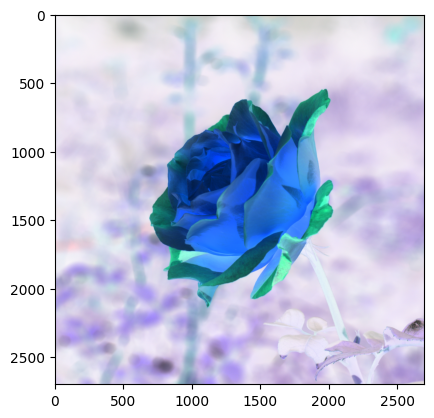

In [16]:
# invert the image (compute one minus the image) What does this do to the colors in the image?
inverted = 1 - im
plt.imshow(inverted)

3. Load the "hand" image (`hand.jpg`) and show it.  Show the three color channels separately.

/var/folders/q8/mqm68gfx7pjfpqftf7y_v6140000gn/T/ipykernel_76523/3008153824.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread('./hand.jpg')


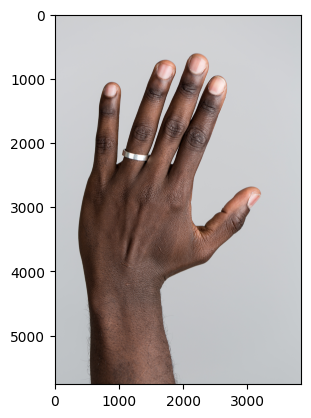

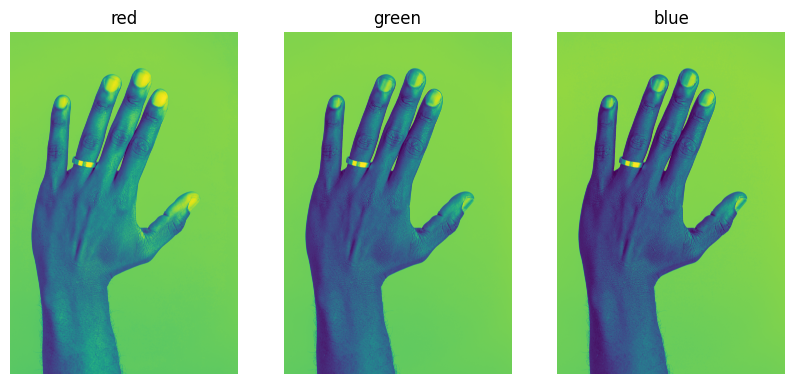

In [18]:
# load the "hand.jpg" image and show it. Show the three color channels separately.
im = imageio.imread('./hand.jpg')
plt.imshow(im)
im = im.astype('float32')/255
fig,axes = plt.subplots(1,3,figsize=(10,20))

channels = ['red','green','blue']
for i,(ax,channel) in enumerate(zip(axes,channels)):
    ax.imshow(im[...,i])
    ax.axis('off')
    ax.set_title(channel)

4. Now convert the image to the [Hue Saturation Value](https://en.wikipedia.org/wiki/HSL_and_HSV) colorspace (see [`skimage.color.rgb2hsv`](https://scikit-image.org/docs/stable/auto_examples/color_exposure/plot_rgb_to_hsv.html)).    Show each channel of the HSV image.  



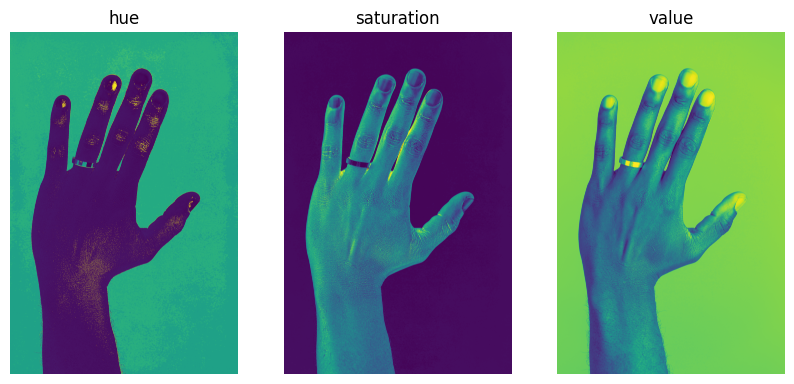

In [19]:
# convert the image to the hue saturation value (HSV) colorspace (see the skimage.color.rgb2hsv function). show each channel of the hsv image.
hsv = skimage.color.rgb2hsv(im)
fig,axes = plt.subplots(1,3,figsize=(10,20))
channels = ['hue','saturation','value']
for i,(ax,channel) in enumerate(zip(axes,channels)):
    ax.imshow(hsv[...,i])
    ax.axis('off')
    ax.set_title(channel)

5. We want to separate the image into foreground (hand) and background using a threshold on one of the color channels.  All values greater than the threshold will be classified as foreground, and all othe values will be classified as background.

Would it be easier to separate this image into foreground and background using one of the RGB channels, or one of the HSV channels?

Look at the histogram for each channel to identify a good channel and threshold value for separating the image into foreground and background.  Apply the threshold and show the Boolean mask to evaluate the results.

/var/folders/q8/mqm68gfx7pjfpqftf7y_v6140000gn/T/ipykernel_76523/311561410.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread('./hand.jpg')


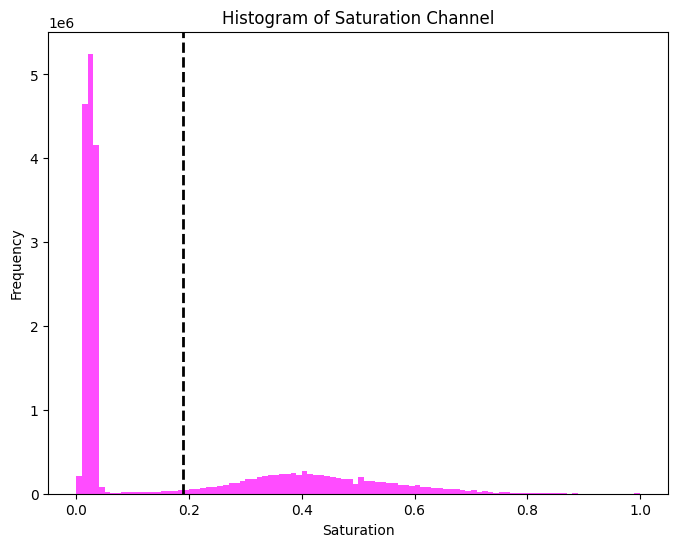

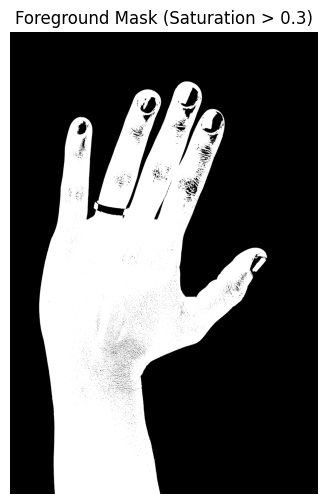

In [27]:
im = imageio.imread('./hand.jpg')
im = im.astype('float32') / 255
im_hsv = colors.rgb_to_hsv(im)
saturation = im_hsv[..., 1]

# histogram of the saturation channel
plt.figure(figsize=(8,6))
plt.hist(saturation.flatten(), bins=100, color='magenta', alpha=0.7)
plt.axvline(x=0.19, color='black', linestyle='dashed', linewidth=2)
plt.title('Histogram of Saturation Channel')
plt.xlabel('Saturation')
plt.ylabel('Frequency')
plt.show()

# threshold to create a Boolean mask for foreground (hand)
threshold = 0.19
mask = saturation > threshold


plt.figure(figsize=(6, 6))
plt.imshow(mask, cmap='gray')
plt.title('Foreground Mask (Saturation > 0.3)')
plt.axis('off')
plt.show()